In [1]:
import import_ipynb

from keras.models import load_model

from control_data import *
from corr_pred import data_corr, pred_days
from make_df import merge_list
from modeling import *

Using TensorFlow backend.
importing Jupyter notebook from control_data.ipynb
importing Jupyter notebook from corr_pred.ipynb
importing Jupyter notebook from make_df.ipynb
importing Jupyter notebook from modeling.ipynb


In [2]:
lg_data = pd.read_csv('data/066570.csv', index_col = 0)
lg_data

,종가,거래량,기관매매량,외국인매매량,외국인보유율
2009-12-04,115500.0,2173892.0,148804.0,441274.0,27.64
2009-12-07,116500.0,1480237.0,-178243.0,455106.0,27.94
2009-12-08,116500.0,1052500.0,-103475.0,254921.0,28.11
2009-12-09,117500.0,1060857.0,-109753.0,138751.0,28.21
2009-12-10,117500.0,1484562.0,-150623.0,70291.0,28.26
...,...,...,...,...,...
2020-01-17,69200.0,464204.0,-89757.0,11089.0,33.77
2020-01-20,71200.0,894609.0,89928.0,249277.0,33.94
2020-01-21,70100.0,379059.0,-30571.0,-17604.0,34.09
2020-01-22,70400.0,546215.0,64709.0,-73675.0,34.08


In [3]:
df = lg_data
corr = data_corr(df, y = -1)
corr

['y: 외국인보유율',
 'x: 종가',
 LinregressResult(slope=0.00019754502625637797, intercept=11.269676308608796, rvalue=0.573299174699053, pvalue=1.9316448402787148e-218, stderr=5.64879696093616e-06)]

In [4]:
x_train, x_test, y_train, y_test = set_data(df)
prices, foreign_rate, p_figs, a_figs = set_data(df, values = True)

In [5]:
# model = price_pred_model(save = True, filename = '20.02.04', lstm = 3)
# model = load_model('data/20.02.04_unfitted.h5')

In [6]:
# fit = model_fit(
#     model, x_train, y_train, save = True, img_save = True, filename = '20.02.04', epochs = 20)
fit = load_model('data/20.02.04_fitted.h5')

In [7]:
train_pred = to_1d_list(fit.predict(x_train))
test_pred = to_1d_list(fit.predict(x_test))

d_train_pred = denormalize(train_pred, p_figs)
d_test_pred = denormalize(test_pred, p_figs)
d_last_pred = pred_days(
    fit, prices, foreign_rate, p_figs, a_figs, corr[2][:2], days = 4)

d_test_pred_added = [d_train_pred[-1]] + d_test_pred + [d_last_pred[0][0]]
d_last_pred = d_last_pred[0]

empty = len(prices) - (len(d_train_pred) + len(d_test_pred))

print(len(d_train_pred), len(d_test_pred_added), empty)

1245 1247 10


In [8]:
result_df = merge_list(
    df, empty, prices, d_train_pred, d_test_pred_added, d_last_pred, len(d_test_pred_added)
    )

result_df

,real,trained,tested,pred
2009-12-04,115500.0,NaN,NaN,NaN
2009-12-07,116500.0,NaN,NaN,NaN
2009-12-08,116500.0,NaN,NaN,NaN
2009-12-09,117500.0,NaN,NaN,NaN
2009-12-10,117500.0,NaN,NaN,NaN
...,...,...,...,...
2020-01-22,70400.0,NaN,69280.0,NaN
2020-01-23,69000.0,NaN,67570.0,67570.0
D+1,NaN,NaN,NaN,65280.0
D+2,NaN,NaN,NaN,63890.0


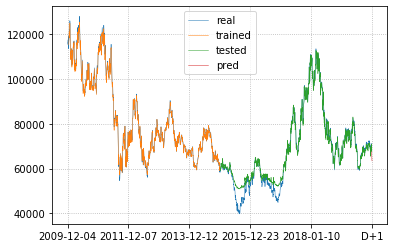

In [9]:
result_df.plot(linewidth = '.5')
plt.grid(ls = ':')
# plt.xticks(np.arange(min(prices), max(prices), step = 0.2))
plt.autoscale(tight = False)

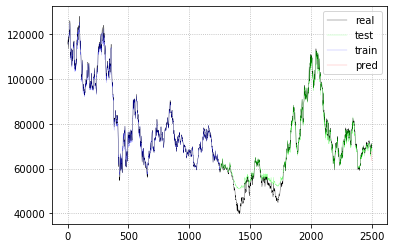

In [10]:
plt.plot(list(result_df[result_df.columns[0]]), 'black', linewidth = '.3')
plt.plot(list(result_df[result_df.columns[2]]), 'lime', linewidth = '.3', alpha = 0.5)
plt.plot(list(result_df[result_df.columns[1]]), 'blue', linewidth = '.3', alpha = 0.5)
plt.plot(list(result_df[result_df.columns[3]]), 'red', linewidth = '.3', alpha = 0.5)
# x축 idx 수정 가능한지?
plt.grid(ls = ':')
plt.legend(['real', 'test', 'train', 'pred'])

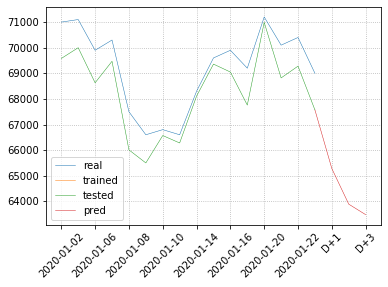

In [12]:
result_df['2019-12.31':].plot(linewidth = '.5')
plt.grid(ls = ':')
# plt.xticks(np.arange(min(prices), max(prices), step = 0.2))
plt.xticks(rotation = 45)
plt.autoscale(tight = False)

In [12]:
pred_days(fit, prices, foreign_rate, p_figs, a_figs, corr[2][:2], days = 100)

([67200.0,
  65830.0,
  63990.0,
  63750.0,
  63790.0,
  63970.0,
  64160.0,
  64460.0,
  64830.0,
  65230.0,
  65590.0,
  65910.0,
  66210.0,
  66500.0,
  66780.0,
  67060.0,
  67320.0,
  67580.0,
  67830.0,
  68070.0,
  68300.0,
  68530.0,
  68750.0,
  68970.0,
  69180.0,
  69380.0,
  69570.0,
  69760.0,
  69930.0,
  70100.0,
  70260.0,
  70420.0,
  70570.0,
  70710.0,
  70840.0,
  70970.0,
  71090.0,
  71210.0,
  71320.0,
  71420.0,
  71520.0,
  71610.0,
  71690.0,
  71770.0,
  71840.0,
  71910.0,
  71980.0,
  72050.0,
  72110.0,
  72170.0,
  72220.0,
  72270.0,
  72320.0,
  72360.0,
  72400.0,
  72440.0,
  72480.0,
  72510.0,
  72540.0,
  72570.0,
  72600.0,
  72630.0,
  72650.0,
  72670.0,
  72690.0,
  72710.0,
  72730.0,
  72750.0,
  72770.0,
  72780.0,
  72790.0,
  72800.0,
  72810.0,
  72820.0,
  72830.0,
  72840.0,
  72850.0,
  72860.0,
  72870.0,
  72880.0,
  72890.0,
  72900.0,
  72910.0,
  72920.0,
  72930.0,
  72930.0,
  72930.0,
  72930.0,
  72930.0,
  72930.0,
  72930.0,